In [5]:
from py2neo import Graph, NodeSelector
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import ticker, style
import benford as bf
import datetime

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

graph = Graph("http://localhost:7474", password = "admin")

In [6]:
data = DataFrame(graph.data("MATCH (s:Smlouva) RETURN s.datum_uzavreni"))

dny = data["s.datum_uzavreni"].dropna().apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").weekday() + 1)

In [7]:
dny

0         2
1         4
2         1
3         3
4         5
5         4
6         1
7         1
8         2
9         3
10        4
11        4
12        3
13        3
14        3
15        5
16        3
17        4
18        4
19        1
20        2
21        1
22        4
23        1
24        2
25        5
26        1
27        5
28        5
29        3
         ..
983031    2
983032    3
983033    4
983034    5
983035    1
983036    2
983037    2
983038    2
983039    3
983040    4
983041    2
983042    5
983043    4
983044    4
983045    1
983046    5
983047    4
983048    4
983049    5
983050    4
983051    4
983052    5
983053    5
983054    1
983055    5
983056    3
983057    4
983058    2
983059    3
983060    3
Name: s.datum_uzavreni, Length: 983061, dtype: int64

In [8]:
# formatter = ticker.FuncFormatter(lambda x, p: str(int(x) / 1000000))

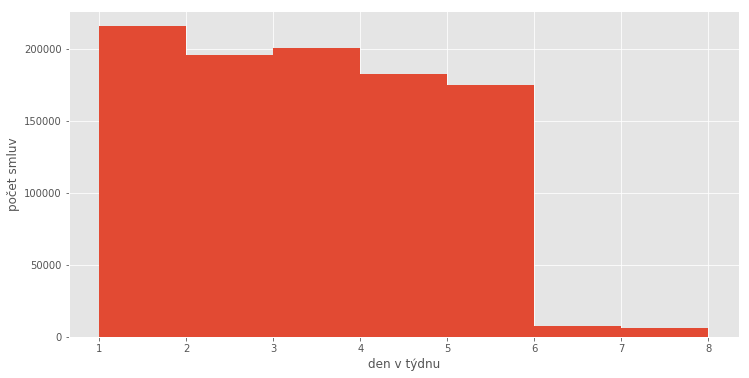

In [16]:
fig, axes = plt.subplots()
axes.set_xlabel("den v týdnu")
axes.set_ylabel("počet smluv")
# axes.get_xaxis().set_major_formatter(formatter)
axes.hist(dny, bins=range(1, 9, 1), rwidth=1)
fig.savefig("vystup/dny-uzavreni.pdf", bbox_inches='tight')